In [1655]:
import os
import pandas as pd
import io
import numpy as np
import plotnine
from plotnine import *
%matplotlib inline

# Data Cleaning

In [1656]:
df = pd.read_csv('/Users/nicomontenegrob/Documents/NYU/Data Bootcamp/IT Salary Survey EU  2020.csv') 
# DELETE

In [1657]:
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [1658]:
cols0 = df.iloc[:,0] # Column will be dropped, not useful

cols1 = df.iloc[:,1:9] # Drop NaN and 0s

cols2 = df.iloc[:,9] # Replace NaN with str

cols3 = df.iloc[:,10] # Leave intact

cols4 = df.iloc[:,11] # Replace NaN with 0

cols5 = df.iloc[:,12:14] # Replace NaN with str

cols6 = df.iloc[:,14] # Replace NaN with 0

cols7 = df.iloc[:,15:21] # Drop NaN and 0s

cols8 = df.iloc[:,21:len(df)] # Replace with 0

# Sets of columns that need replacements need to be done first to maintain size of dataframe

In [1659]:
# cols2, cols4, cols5, and cols8 need to replace NaNs with 0s or str, so these are handled first

fcols2 = cols2.replace(np.nan, 'No Response')

fcols4 = cols4.replace(np.nan, 0)

fcols5 = cols5.replace(np.nan, 'No Response')

fcols6 = cols6.replace(np.nan, 0)

fcols8 = cols8.replace(np.nan, 0)

In [1660]:
# cols1 and cols7 both need to drop all NaN and 0s, so in preparation all 0s will be converted to NaN

fcols1 = cols1.replace(0, np.nan)

fcols7 = cols7.replace(0, np.nan)

In [1661]:
# This creates the first draft of the clean dataframe

concatdf = pd.concat([fcols1, fcols2, cols3, fcols4, fcols5, fcols6, fcols7, fcols8], axis = 1)

df = concatdf.dropna()

df = df.reset_index()

df.drop('index', axis = 1, inplace = True)

In [1662]:
df

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,26,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,0,0
1,26,Male,Berlin,Backend Developer,7,4,Senior,Ruby,No Response,80000,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,0,0
2,29,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000,...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,0,0
3,28,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,No Response,54000,...,No Response,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,0,0
4,37,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000,...,No Response,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,31,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000,...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,0,0
1035,33,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,No Response,60000,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,0,0
1036,39,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000,...,No Response,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,0,0
1037,26,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350,...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,0,0


In [1663]:
# All numerical columns should be converted to strings to help with cleaning 

columns = df.columns.tolist()

numcolumns = ['Age','Total years of experience', 'Years of experience in Germany',
            'Yearly brutto salary (without bonus and stocks) in EUR',
            'Yearly bonus + stocks in EUR',
            'Number of vacation days',
            'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
            'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

txtcolumns = ['Gender', 'City','Position ', 'Seniority level',
              'Your main technology / programming language',
              'Employment status',
              'Сontract duration',
              'Main language at work',
              'Company size', 'Company type',
              'Have you lost your job due to the coronavirus outbreak?']

for col in numcolumns:
    df[col] = df[col].apply(str)

In [1664]:
columns

['Age',
 'Gender',
 'City',
 'Position ',
 'Total years of experience',
 'Years of experience in Germany',
 'Seniority level',
 'Your main technology / programming language',
 'Other technologies/programming languages you use often',
 'Yearly brutto salary (without bonus and stocks) in EUR',
 'Yearly bonus + stocks in EUR',
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
 'Annual bonus+stocks one year ago. Only answer if staying in same country',
 'Number of vacation days',
 'Employment status',
 'Сontract duration',
 'Main language at work',
 'Company size',
 'Company type',
 'Have you lost your job due to the coronavirus outbreak?',
 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [1665]:
def uv(colname):
    return df[colname].unique()

# This function shows if there are individual values that need to be cleaned in a column (i.e. those that are unknown
# or unforseen unless one looks for them specifically) that did not get cleaned in the initial filter

# This is particularly important to know before replacing , with . using replace()

In [1666]:
for i in numcolumns:
    print(i)
    print(uv(i))
    print("")

Age
['26.0' '29.0' '28.0' '37.0' '32.0' '24.0' '35.0' '34.0' '31.0' '27.0'
 '25.0' '59.0' '36.0' '38.0' '40.0' '39.0' '33.0' '30.0' '49.0' '48.0'
 '44.0' '66.0' '45.0' '43.0' '42.0' '46.0' '56.0' '53.0' '41.0' '65.0'
 '47.0' '22.0' '23.0' '50.0' '51.0' '20.0' '54.0']

Total years of experience
['5' '7' '12' '4' '17' '6' '8' '15' '2' '14' '11' '30' '18' '13' '10' '25'
 '3' '40' '26' '9' '19' '20' '5.5' '22' '16' '0.8' '1' '1.5' '21' '2.5'
 '28' '29' '23' '1,5' '24' '0' '4.5' '27'
 '1 (as QA Engineer) / 11 in total' '2,5' '15, thereof 8 as CTO' '31'
 '6 (not as a data scientist, but as a lab scientist)' '3.5'
 'less than year']

Years of experience in Germany
['3' '4' '6' '1' '0.4' '2' '5' '9' '30' '7' '15' '11' '10' '18' '0' '2.5'
 '1,5' '1.5' '0.5' '13' '14' '8' '3.5' '0.8' '12' '3,5' '20' '0.9' '25'
 '< 1' '0.25' '16' '19' '2,5' '3 months' '0,5' '4.5' '0.1' '2.6'
 '3 (in Poland)' '<1' '⁰' '0,3' '-'
 '6 (not as a data scientist, but as a lab scientist)' '0.2'
 'less than year']

Yearly

In [1667]:
# Clearly there are more values to clean

# These functions can help expedite the process

def getindex(colname, value):
    return pd.Index(df[colname]).get_loc(value)

def indivcleaner(colname,lookup,replacement):
    df.iloc[getindex(colname, lookup)] = df.iloc[getindex(colname, lookup)].replace(lookup, replacement)

# For 'Total years of experience'

c = 'Total years of experience'

indivcleaner('Total years of experience', '15, thereof 8 as CTO', '15')

indivcleaner(c, '1 (as QA Engineer) / 11 in total', '11')

indivcleaner(c, '6 (not as a data scientist, but as a lab scientist)', '0')

indivcleaner(c, 'less than year', '0')

In [1668]:
# For 'Years of experience in Germany'

c = 'Years of experience in Germany'

# indivcleaner(c, '6 (not as a data scientist, but as a lab scientist)', '0')

indivcleaner(c, '-', '0')

indivcleaner(c, '⁰', '0')

indivcleaner(c, '<1', '0')

indivcleaner(c, '3 (in Poland)', '0')

indivcleaner(c, '3 months', '0.25')

indivcleaner(c, '< 1', '0')

# indivcleaner(c, 'less than year', '0')

In [1669]:
# 'For Number of vacation days'

c = 'Number of vacation days'

indivcleaner(c , 'Unlimited', '365')

indivcleaner(c, 'unlimited', '365')

indivcleaner(c, '24 labour days' , '24')

indivcleaner(c, '23+', '23')

indivcleaner(c, '~25', '25')

indivcleaner(c, '30 in contract (but theoretically unlimited)', '30')

In [1670]:
# For 'Yearly bonus + stocks in EUR'

c = 'Yearly bonus + stocks in EUR'

indivcleaner(c, 'bvg only', '0')

indivcleaner(c, '15000+-', '15000')

indivcleaner(c, 'Not sure', '0')

indivcleaner(c, 'Na', '0')

indivcleaner(c, 'depends', '0')

In [1671]:
# For 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'

c = 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'

indivcleaner(c, '600 nett', '600')

indivcleaner(c, '20%', '20') # Assuming the % was misread an Euro symbol

indivcleaner(c, 'I was able to move all equipment I need to work to home', '0')

indivcleaner(c, '0,00', '0')

indivcleaner(c, '200 Amazon voucher', '200')

indivcleaner(c, '40 every month', '480') # 40 * 12 = 480

indivcleaner(c, 'no','0')

indivcleaner(c, 'No', '0')

indivcleaner(c, '400 / month', '4800') # 400 * 12 = 4800

indivcleaner(c, 'yes', '100')

In [1672]:
for i in numcolumns:
    print(i)
    print(uv(i))
    print("")

Age
['26.0' '29.0' '28.0' '37.0' '32.0' '24.0' '35.0' '34.0' '31.0' '27.0'
 '25.0' '59.0' '36.0' '38.0' '40.0' '39.0' '33.0' '30.0' '49.0' '48.0'
 '44.0' '66.0' '45.0' '43.0' '42.0' '46.0' '56.0' '53.0' '41.0' '65.0'
 '47.0' '22.0' '23.0' '50.0' '51.0' '20.0' '54.0']

Total years of experience
['5' '7' '12' '4' '17' '6' '8' '15' '2' '14' '11' '30' '18' '13' '10' '25'
 '3' '40' '26' '9' '19' '20' '5.5' '22' '16' '0.8' '1' '1.5' '21' '2.5'
 '28' '29' '23' '1,5' '24' '0' '4.5' '27' '2,5' '31' '3.5']

Years of experience in Germany
['3' '4' '6' '1' '0.4' '2' '5' '9' '30' '7' '15' '11' '10' '18' '0' '2.5'
 '1,5' '1.5' '0.5' '13' '14' '8' '3.5' '0.8' '12' '3,5' '20' '0.9' '25'
 '0.25' '16' '19' '2,5' '0,5' '4.5' '0.1' '2.6' '0,3' '0.2']

Yearly brutto salary (without bonus and stocks) in EUR
['80000.0' '120000.0' '54000.0' '62000.0' '76000.0' '57000.0' '65000.0'
 '56000.0' '95000.0' '52500.0' '70000.0' '75000.0' '60350.0' '60000.0'
 '100000.0' '69000.0' '47400.0' '85000.0' '63000.0' '150000.

In [1673]:
# Even after using indivcleaner(), there are still noncomforming values that need to be adressed 




In [1674]:
# Now some more additional manual cleaning that was not picked up by indivcleaner()

df.loc[df['Number of vacation days'].str.contains('unlimited'), 'Number of vacation days'] = '365'

df.loc[df['Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']\
.str.contains('75% from government'), 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'] = '0' 
# This is because question is asking about employer assistance and it is again assumed that % is misread for Euros

# This blanket swap from coma to dot and a "zero drop" can be only done after using indivcleaner()

def coma_to_dot(colname):
    df[colname] = df[colname].str.replace(',','.')
    
def space_remover(colname):
    df[colname] = df[colname].str.replace(' ','')

for i in numcolumns:
    coma_to_dot(i)
    space_remover(i)

In [1675]:
for i in numcolumns:
    print(i)
    print(uv(i))
    print("")

Age
['26.0' '29.0' '28.0' '37.0' '32.0' '24.0' '35.0' '34.0' '31.0' '27.0'
 '25.0' '59.0' '36.0' '38.0' '40.0' '39.0' '33.0' '30.0' '49.0' '48.0'
 '44.0' '66.0' '45.0' '43.0' '42.0' '46.0' '56.0' '53.0' '41.0' '65.0'
 '47.0' '22.0' '23.0' '50.0' '51.0' '20.0' '54.0']

Total years of experience
['5' '7' '12' '4' '17' '6' '8' '15' '2' '14' '11' '30' '18' '13' '10' '25'
 '3' '40' '26' '9' '19' '20' '5.5' '22' '16' '0.8' '1' '1.5' '21' '2.5'
 '28' '29' '23' '24' '0' '4.5' '27' '31' '3.5']

Years of experience in Germany
['3' '4' '6' '1' '0.4' '2' '5' '9' '30' '7' '15' '11' '10' '18' '0' '2.5'
 '1.5' '0.5' '13' '14' '8' '3.5' '0.8' '12' '20' '0.9' '25' '0.25' '16'
 '19' '4.5' '0.1' '2.6' '0.3' '0.2']

Yearly brutto salary (without bonus and stocks) in EUR
['80000.0' '120000.0' '54000.0' '62000.0' '76000.0' '57000.0' '65000.0'
 '56000.0' '95000.0' '52500.0' '70000.0' '75000.0' '60350.0' '60000.0'
 '100000.0' '69000.0' '47400.0' '85000.0' '63000.0' '150000.0' '45000.0'
 '72000.0' '67000.0' '1

In [1676]:
for col in numcolumns:
    df[col] = df[col].apply(float)

In [1677]:
df['Total years of experience'] = df['Total years of experience'].round()

df['Years of experience in Germany'] = df['Years of experience in Germany'].round()

In [1678]:
df['Total years of experience'].unique()

array([ 5.,  7., 12.,  4., 17.,  6.,  8., 15.,  2., 14., 11., 30., 18.,
       13., 10., 25.,  3., 40., 26.,  9., 19., 20., 22., 16.,  1., 21.,
       28., 29., 23., 24.,  0., 27., 31.])

In [1679]:
df

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,26,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,0,0
1,26,Male,Berlin,Backend Developer,7,4,Senior,Ruby,No Response,80000,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,0,0
2,29,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000,...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,0,0
3,28,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,No Response,54000,...,No Response,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,0,0
4,37,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000,...,No Response,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,31,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000,...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,0,0
1035,33,Male,Berlin,Researcher/ Consumer Insights Analyst,10,2,Senior,consumer analysis,No Response,60000,...,2500,365,Full-time employee,Unlimited contract,English,1000+,Product,No,0,0
1036,39,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000,...,No Response,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,0,0
1037,26,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350,...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,0,0


In [1680]:
# Now text columns

txtcolumns = ['Gender', 'City','Position ', 'Seniority level',
              'Your main technology / programming language',
              'Employment status',
              'Сontract duration',
              'Main language at work',
              'Company size', 'Company type',
              'Have you lost your job due to the coronavirus outbreak?']

In [1681]:
for i in txtcolumns:
    print(i)
    print(uv(i))
    print("")

Gender
['Male' 'Female' 'Diverse']

City
['Munich' 'Berlin' 'Hamburg' 'Wolfsburg' 'Schleswig-Holstein'
 'Konstanz area' 'Frankfurt' 'Cologne' 'Kempten' 'Münster' 'Rosenheim'
 'Mannheim ' 'Stuttgart' 'Boeblingen' 'Düsseldorf' 'Ingolstadt' 'Nürnberg'
 'Ansbach' 'Leipzig' 'Mannheim' 'Tuttlingen' 'Bonn' 'Moscow' 'Warsaw'
 'Heidelberg' 'Aachen' 'Riga, Latvia' 'Dusseldorf' 'Helsinki' 'Würzburg'
 'Kiev' 'Den Haag' 'London' 'Amsterdam' 'Tallinn' 'Prague' 'Utrecht'
 'Stockholm' 'Braunschweig ' 'Dresden' 'Kyiv' 'Stuttgart ' 'Lübeck'
 'Nuremberg ' 'Bodensee' 'Milan' 'Salzburg' 'Rome' 'Karlsruhe' 'Cupertino'
 'Paris' 'Dublin ' 'Paderborn' 'Konstanz' 'Ulm' 'Barcelona' 'Bölingen'
 'Tampere (Finland)' 'Siegen' 'Minsk' 'Düsseldorf ' 'Nuremberg'
 'Friedrichshafen' 'Hannover' 'Walldorf' 'France' 'Regensburg'
 'Warsaw, Poland' 'Heilbronn' 'Dortmund' 'Jena' 'City in Russia' 'Cracow'
 'Brunswick' 'Zurich' 'Dublin' 'Madrid' 'Lisbon' 'Sofia' 'Luttich'
 'Milano' 'Bielefeld' 'NJ, USA' 'Istanbul' 'warsaw' 'Hild

In [1682]:
# For City


# City column has an exceptional amount of extra spaces, so removing these first should help clean data

c = 'City'

space_remover(c)

uv('City')

array(['Munich', 'Berlin', 'Hamburg', 'Wolfsburg', 'Schleswig-Holstein',
       'Konstanzarea', 'Frankfurt', 'Cologne', 'Kempten', 'Münster',
       'Rosenheim', 'Mannheim', 'Stuttgart', 'Boeblingen', 'Düsseldorf',
       'Ingolstadt', 'Nürnberg', 'Ansbach', 'Leipzig', 'Tuttlingen',
       'Bonn', 'Moscow', 'Warsaw', 'Heidelberg', 'Aachen', 'Riga,Latvia',
       'Dusseldorf', 'Helsinki', 'Würzburg', 'Kiev', 'DenHaag', 'London',
       'Amsterdam', 'Tallinn', 'Prague', 'Utrecht', 'Stockholm',
       'Braunschweig', 'Dresden', 'Kyiv', 'Lübeck', 'Nuremberg',
       'Bodensee', 'Milan', 'Salzburg', 'Rome', 'Karlsruhe', 'Cupertino',
       'Paris', 'Dublin', 'Paderborn', 'Konstanz', 'Ulm', 'Barcelona',
       'Bölingen', 'Tampere(Finland)', 'Siegen', 'Minsk',
       'Friedrichshafen', 'Hannover', 'Walldorf', 'France', 'Regensburg',
       'Warsaw,Poland', 'Heilbronn', 'Dortmund', 'Jena', 'CityinRussia',
       'Cracow', 'Brunswick', 'Zurich', 'Madrid', 'Lisbon', 'Sofia',
       'Luttich', '

In [1683]:

indivcleaner(c, 'Kiev', 'Kyiv')

indivcleaner(c, 'Tampere(Finland)', 'Tampere')

indivcleaner(c, 'MurnauamStaffelsee', 'Murnau am Staffelse')

indivcleaner(c, 'CityinRussia', 'Moscow') # Moscow is the most populated city in Russia

indivcleaner(c, 'Warsaw,Poland', 'Warsaw')

indivcleaner(c, 'Fr', 'Paris') # Paris is the most populated city in France (assuming Fr is France)

indivcleaner(c, 'France', 'Paris')

indivcleaner(c, 'DenHaag', 'Den Haag')

indivcleaner(c, 'NJ,USA', 'NA') # Survey is for EU only

indivcleaner(c, 'Cupertino', 'NA')

indivcleaner(c, 'Duesseldorf', 'Dusseldorf')

indivcleaner(c, 'Dusseldurf', 'Dusseldorf')

indivcleaner(c, 'Düsseldorf', 'Dusseldorf')

indivcleaner(c, 'Konstanzarea', 'Konstanz')

indivcleaner(c, 'Zürich', 'Zurich')

indivcleaner(c, 'Nürnberg', 'Nuremberg')

indivcleaner(c, 'Riga,Latvia', 'Riga')

indivcleaner(c, 'Prefernottosay', 'NA') # City data is not useful but rest of entries are

indivcleaner(c, 'Milano', 'Milan')

indivcleaner(c, 'warsaw', 'Warsaw')

In [1684]:
# For Seniority level

c = 'Seniority level'

indivcleaner(c, 'no idea, there are no ranges in the firm ', 'No-level')

indivcleaner(c, 'Working Student', 'Intern')

indivcleaner(c, 'intern', 'Intern')

indivcleaner(c, 'student', 'Intern')

indivcleaner(c, 'C-level executive manager', 'C-Level')

indivcleaner(c, 'C-Level', 'C-Level')

indivcleaner(c, 'CTO', 'C-Level')

indivcleaner(c, 'No level ', 'No level')

indivcleaner(c, 'No-level', 'No level')

# For the following titles, salaries are very comparable so they should be combined for sake of fragmentation

# The goal with these replacements is to avoid positions that have only a couple entries pass through to data analysis

indivcleaner(c, 'Head', 'Lead') 

indivcleaner(c, 'Entry level', 'Junior')

seniorpositions = ['Director', 'Manager', 'Principal', 'VP', 'Work Center Manager'] # Too few entries each

for i in seniorpositions:
    indivcleaner(c, i, 'Senior')

In [1685]:
# For Employment Status

c = 'Employment status'

indivcleaner(c, 'Full-time employee', 'Full-time')

indivcleaner(c, 'Self-employed (freelancer)', 'Self-employed')

indivcleaner(c, 'Part-time employee', 'Part-time')

indivcleaner(c, 'working student', 'Intern')

#indivcleaner(c, 'student', 'Intern')

indivcleaner(c, 'Full-time position, part-time position, & self-employed (freelancing, tutoring)', 'Full-time')

indivcleaner(c, "full-time, but 32 hours per week (it was my request, I'm a student)", 'Full-time')

indivcleaner(c, 'Werkstudent', 'Intern')

In [1686]:
# For losing job

c = 'Have you lost your job due to the coronavirus outbreak?' # Question is assumed to be asked about a job, not current

indivcleaner(c, "i didn't but will be looking for new one because of covid", 'No')

indivcleaner(c, 'Have been a freelancer at the beginning of year', 'No')

indivcleaner(c, '0', 'No')

indivcleaner(c, 'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months', 'No')

indivcleaner(c, 'Leads and project inquiries have slowed down', 'Yes')

indivcleaner(c, 'Laid off for a bit', 'Yes')

indivcleaner(c, 'yes but found a new one with better pay / perks', 'Yes')

In [1687]:
# For Contract duration

c = 'Сontract duration'

indivcleaner(c, '0', 'Unlimited contract')

In [1688]:
# For language

c = 'Main language at work'

indivcleaner(c, 'English and German', 'Bilingual')

indivcleaner(c, 'Русский', 'Russian')

indivcleaner(c, 'Deuglisch', 'Bilingual')

indivcleaner(c, 'both', 'Bilingual')

indivcleaner(c, 'Russian, English', 'Bilingual')

In [1689]:
# For Company type

# Although company type does provide more specific data, it makes more sense
# to group by industry to have a richer analysis

# Visualising the data later on will show if assumptions are correct or not

c = 'Company type'

finance = ['Bank ', 'Bank', 'Financial ', 'Insurance', 'Finance']

ecomm = ['E-commerce', 'e-commerce', 'Ecommerce', 'E-Commerce','eCommerce']

tech_and_telcom = ['Media', 'Cloud', 'Telecommunications','IT-Outsourcing','Game Company',
                   'Publishing and Technology','SaaS', 'Publisher','FAANG']

retail = ['Automotive','consumer goods','Retail', 'Non-tech retail']

bus_services = ['Consulting / Agency', 'Outsorce', 'Market Research ',
                'Consulting and Product', 'Corporation ', 'Research',
                'corporate incubator','Outsourse']

ed = ['University', 'Science Institute ', 'Research institute','Institute',
      'Education']

startup = ['Startup', 'Enterprise','Full-time position in Education, part-time position in at a data startup',
           'Bloody enterprise']

util_man_en = ['Product','Construction','Energy ','Utilities','Transport & Logistics','Old industry',
               'Semiconductor']
             
gen = ['Behörde','Big commercial','IT Department of established business','Corporation',
       'service', 'Concern','Handel ','Biergarten ']

for entry in finance:
    indivcleaner(c, entry, 'Finance')
    
for entry in ecomm:
    indivcleaner(c, entry, 'E-Commerce')
    
for entry in tech_and_telcom:
    indivcleaner(c, entry, 'Tech, Media and Telecom')
    
for entry in retail:
    indivcleaner(c, entry, 'Retail')
    
for entry in bus_services:
    indivcleaner(c, entry, 'Business Services')
    
for entry in ed:
    indivcleaner(c, entry, 'Education and Research')
    
for entry in startup:
    indivcleaner(c,entry, 'Entrepreneurship')
    
for entry in util_man_en:
    indivcleaner(c, entry, 'Utilities and Manufacturing')
    
for entry in gen:
    indivcleaner(c, entry, 'General')

In [1690]:
# Lastly, main technology needs to be cleaned so that there is ONE entry per row since the questions asks about MAIN
# technology

uv('Your main technology / programming language')

array(['TypeScript', 'Ruby', 'Javascript / Typescript', 'Javascript',
       'C# .NET', 'AWS, GCP, Python,K8s', 'Typescript', 'PHP', 'Java',
       'Aws Hadoop Postgre Typescript', 'Kotlin', 'kotlin', 'NodeJS',
       'iOS', 'Kubernetes', 'Charles', 'SQL', 'Go', 'java', 'Python',
       'Figma', 'JavaScript', 'Go/Python', 'React', 'Php',
       'ruby on rails', 'JavaScript/ES6', '.NET', 'C#', 'Js', 'android',
       'JavaScript ', 'Scala', 'python', 'VHDL', 'Power BI', 'PHP ',
       'none', 'Android', 'Swift', 'ML', 'php', 'C++', 'Scala, React.js',
       'Ml/Python', 'C#, .net core', 'JavaScript/TypeScript',
       'Ruby on Rails', 'Azure, SAP', 'Frontend', 'Java, JavaScript',
       'yaml', 'Python ', 'JS', '-', 'Agile', 'C',
       'TypeScript, JavaScript', 'Pegasystems platform ',
       'C++, Java, Embedded C', 'Cloud', 'DC Management', '--', 'SWIFT',
       'Java, angular, Aws', 'Swift, objective-c', 'Golang', 'go',
       'DevOps', '.net', 'Node.js', 'R', 'Java, Javascript', 'B

In [1691]:
# Glancing the unqie values shows that there are three main sources of nonconformity in the answers:

# 1) Differences in capitalisations (i.e. python is different from Python)
# 2) Multiple entries per row using '/', spaces, and comas
# 3) Typos

len(uv('Your main technology / programming language'))

244

In [1692]:
# The following code will adress this issue in hopes of homogenising the categories

df['Your main technology / programming language'] \
= [i.upper() for i in df['Your main technology / programming language']]

df['Your main technology / programming language'] \
= [i.split('/')[0] for i in df['Your main technology / programming language']]

df['Your main technology / programming language'] \
= [i.split(',')[0] for i in df['Your main technology / programming language']]

df['Your main technology / programming language'] \
= [i.split('+')[0] for i in df['Your main technology / programming language']]

df['Your main technology / programming language'] \
= [i.split('&')[0] for i in df['Your main technology / programming language']]

df['Your main technology / programming language'] \
= [i.replace(' ','') for i in df['Your main technology / programming language']]

print(len(uv('Your main technology / programming language')),
      uv('Your main technology / programming language'))

121 ['TYPESCRIPT' 'RUBY' 'JAVASCRIPT' 'C#.NET' 'AWS' 'PHP' 'JAVA'
 'AWSHADOOPPOSTGRETYPESCRIPT' 'KOTLIN' 'NODEJS' 'IOS' 'KUBERNETES'
 'CHARLES' 'SQL' 'GO' 'PYTHON' 'FIGMA' 'REACT' 'RUBYONRAILS' '.NET' 'C#'
 'JS' 'ANDROID' 'SCALA' 'VHDL' 'POWERBI' 'NONE' 'SWIFT' 'ML' 'C' 'AZURE'
 'FRONTEND' 'YAML' '-' 'AGILE' 'PEGASYSTEMSPLATFORM' 'CLOUD'
 'DCMANAGEMENT' '--' 'GOLANG' 'DEVOPS' 'NODE.JS' 'R' 'BASH' 'NETWORK'
 'NOTHING' 'QLIKBITOOL' 'BLOCKCHAIN' 'ANGULAR' 'AUTONOMOUSDRIVING' 'T-SQL'
 'PASCAL' 'ORACLE' 'ELIXIR' 'ERLANG' 'OBJECTIVE-C' 'QA' 'ABAP'
 'WEBDEVELOPER' 'TERRAFORM' 'APACHESPARK' 'SAPBW' 'JIRA' 'QML'
 'LINUXKERNEL' 'SEVERAL' 'EMBEDDED' 'BUSINESSDEVELOPMENTMANAGEROPERATION'
 'MANAGEMENT' 'TS' 'SPARK' 'LINUX' 'DWH' 'SKETCH' 'K8S' 'FRONTEND:REACT'
 'VB' 'FBD' 'SAP' 'KUBRRNETES' 'NETWORKING' 'UML' 'COBOL' 'SRE' 'CLOJURE'
 'SPRING' 'ОФМФ' 'REACTJS' 'SAPABAP' 'AI' 'PYTHIN' 'JULIA' 'PMTOOLS'
 'GRAILS' 'PERL' 'HASKELL' 'JAVSCRIPT' 'PYTHON(DJANGO)'
 'NETWORKAUTOMATION' 'POWERSHELL' 'DJANGO' 

In [1693]:
# With these adjustments the majority of redundancies are taken care of, but this creates two
# new problems:

# 1) All languages are now capitalised
# 2) There are some languages that did need a space or capitalization that was removed

df['Your main technology / programming language'] \
= [i.lower() for i in df['Your main technology / programming language']]

df['Your main technology / programming language'] \
= [i.capitalize() for i in df['Your main technology / programming language']]

# Problem 1) is now solved

# Problem 2) needs to be solved on a case-by-case basis, as well as other individual issues
# that were not picked up by the general sweep for '/' and ' '

c = 'Your main technology / programming language'

indivcleaner(c, 'Awshadooppostgretypescript', 'AWS')

indivcleaner(c, 'Pegasystemsplatform', 'Pegasystems Platform')

indivcleaner(c, 'Rubyonrails', 'Ruby on Rails')

indivcleaner(c, 'Autonomousdriving', 'Autonomous Driving')

indivcleaner(c, 'Webdeveloper', 'Web')

indivcleaner(c, 'Linuxkernel', 'Linux')

indivcleaner(c, 'Pythin', 'Python')

indivcleaner(c, 'Reactjs', 'React.js')

indivcleaner(c, 'Embeddedc', 'Embedded C++')

indivcleaner(c, 'Python(django)', 'Django')

indivcleaner(c, 'Javabackend', 'Java')

indivcleaner(c, 'Tricentistosca', 'Tricentis Tosca')

indivcleaner(c, 'Aws', 'AWS')

indivcleaner(c, 'Ios', 'iOS')

indivcleaner(c, 'Sql', 'SQL')

indivcleaner(c, 'Yaml', 'YAML')

In [1694]:
other = ['None', 'Devops', 'Network', 'Nothing', 'Several', 'Businessdevelopmentmanageroperation',
         'Management', 'Networking', 'Networkautomation','Testmanagement', 'Consumeranalysis',
         '-','--']


for i in other:
    indivcleaner(c, i, 'Other')
    
len(uv(c))

102

In [1695]:
uv('Employment status')

array(['Full-time', 'Self-employed', 'Founder', 'Part-time', 'Intern'],
      dtype=object)

In [1698]:
df

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,26,Male,Munich,Software Engineer,5,3,Senior,Typescript,"Kotlin, Javascript / Typescript",80000,...,10000,30,Full-time,Unlimited contract,English,51-100,Utilities and Manufacturing,No,0,0
1,26,Male,Berlin,Backend Developer,7,4,Senior,Ruby,No Response,80000,...,5000,28,Full-time,Unlimited contract,English,101-1000,Utilities and Manufacturing,No,0,0
2,29,Male,Berlin,Software Engineer,12,6,Lead,Javascript,"Javascript / Typescript, Docker",120000,...,100000,30,Self-employed,Temporary contract,English,101-1000,Utilities and Manufacturing,Yes,0,0
3,28,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,No Response,54000,...,No Response,24,Full-time,Unlimited contract,English,51-100,Entrepreneurship,No,0,0
4,37,Male,Berlin,Backend Developer,17,6,Senior,C#.net,".NET, SQL, AWS, Docker",62000,...,No Response,29,Full-time,Unlimited contract,English,101-1000,Utilities and Manufacturing,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,31,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000,...,72000,26,Full-time,Unlimited contract,English,51-100,Utilities and Manufacturing,Yes,0,0
1035,33,Male,Berlin,Researcher/ Consumer Insights Analyst,10,2,Senior,Other,No Response,60000,...,2500,365,Full-time,Unlimited contract,English,1000+,Utilities and Manufacturing,No,0,0
1036,39,Male,Munich,IT Operations Manager,15,2,Lead,Php,"Python, C/C++, Javascript / Typescript, Java /...",110000,...,No Response,28,Full-time,Unlimited contract,English,101-1000,E-Commerce,No,0,0
1037,26,Male,Saarbrücken,Frontend Developer,7,7,Middle,Javascript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350,...,36400,27,Full-time,Unlimited contract,German,101-1000,Utilities and Manufacturing,No,0,0


# Data Analysis

In [847]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

## Blanket Analysis of Yearly Brutto Salary

For the following section, every variable will analyzed to check for relationships

In [849]:


wage = 'Yearly brutto salary (without bonus and stocks) in EUR'

In [850]:
columns = df.columns.tolist()

numcolumns = ['Age','Total years of experience', 'Years of experience in Germany',
            'Yearly brutto salary (without bonus and stocks) in EUR',
            'Yearly bonus + stocks in EUR',
            'Number of vacation days',
            'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
            'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

txtcolumns = ['Gender', 'City','Position ', 'Seniority level',
              'Your main technology / programming language',
              'Employment status',
              'Сontract duration',
              'Main language at work',
              'Company size', 'Company type',
              'Have you lost your job due to the coronavirus outbreak?']

In [851]:
dictionary1 = {}

for col in columns:
    avg = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].mean().to_frame()
    sd = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].std().to_frame()
    n = df[col].value_counts()
    statdf = pd.concat([avg,sd,n], axis=1)
    statdf = statdf.reset_index()
    statdf.columns = [col,'Mean', 'Standard Deviation', 'Sample Size']
    dictionary1[col] = statdf
    dictionary1[col]
    
def getindex(colname, value):
    return pd.Index(df[colname]).get_loc(value)
    
def indivcleaner(colname,lookup,replacement):
    df.iloc[getindex(colname, lookup)] = df.iloc[getindex(colname, lookup)].replace(lookup, replacement)

In [852]:
dictionary2 = {}

def stat_table(dataf,xcol,ycol):
    avg = dataf.groupby(xcol)[ycol].mean().to_frame()
    sd = dataf.groupby(xcol)[ycol].std().to_frame()
    n = dataf[xcol].value_counts()
    statdf2 = pd.concat([avg,sd,n], axis=1)
    statdf2 = statdf2.reset_index()
    statdf2.columns = [xcol,'Mean', 'Standard Deviation', 'Sample Size']
    dictionary2[xcol] = statdf2
    dictionary2[xcol]

In [853]:
def wagebox(colname):
    print(ggplot(df, aes(x=colname, y = wage)) + geom_boxplot() + ylab('Yearly Salary'))
    
def wageplot(colname):
    print(ggplot(df, aes(x=colname, y = wage)) + geom_point() + ylab('Yearly Salary'))
    
pd.set_option('display.max_rows', None)

### Density Curve For Data Distribution

This density curve is extremely important for analyzing yearly salary against any other variable if outliers or unexpected outcomes occur. If conclusions are going to be drawn assumptions are going to be made about appropiate replacements then understanding how this variable is distributed is key.

This curve will be updated throughout as outliers are handled to reasses assumptions about the data.

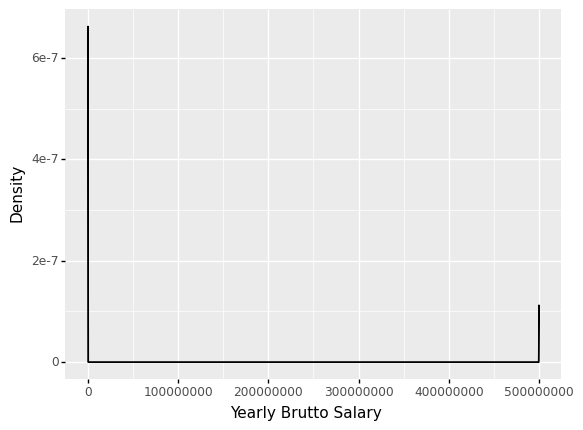

<ggplot: (8772470640842)>

In [854]:
densityplot = ggplot(df, aes(x = wage)) + geom_density() + ylab('Density') + xlab('Yearly Brutto Salary')

densityplot

Analysis: 

- There is overwhelming evidence of outliers. Although good estimates can be made with this chart, it is perhaps more accurate to find them using a table or a more precise plot

In [856]:
dictionary1['Gender']

,Gender,Mean,Standard Deviation,Sample Size
0,Diverse,144500,20506,2
1,Female,3412711,40956897,149
2,Male,73808,35027,888


Analysis:

- We check the mean and standard deviation of salaries for reported genders in the survey. The sample size suggests that there are fewer wowmen working in the IT industry as compared to men. The standard deviation of of men in the industry is also way less than the standard deviation of women in the industry suggesting that in the IT industry, earnings of women vary a lot more than the earnings of men. The higher standard deviation can also stem from a few outliers in the data which affects the mean and the standard deviation.

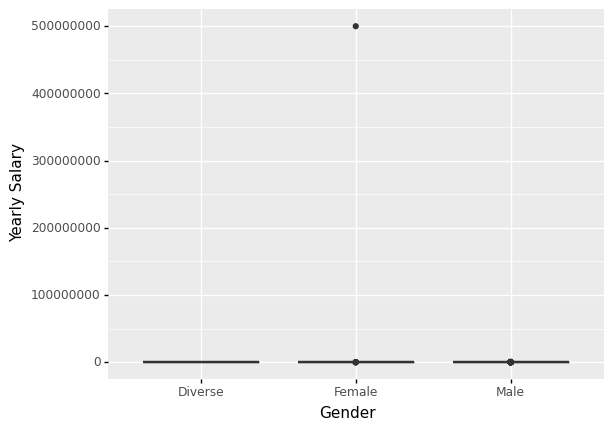

In [858]:
wagebox('Gender')

In [859]:
# Clearly there are outliers from mis-inputs that need to be replaced with a median as the data is skewed to the left

wagemedian = df[wage].median()

In [562]:
# However this particular outlier should be dropped entirely as it likely is an erroneous interviewee or someone
# who input untrustworthy values

df = df.sort_values("Yearly brutto salary (without bonus and stocks) in EUR", ascending = False).iloc[1:, :]


,Unnamed: 0,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
641,641,42.0,Male,Berlin,Frontend Developer,18.0,5.0,Senior,React.js,Javascript / Typescript,...,82000,35.0,Full-time,Unlimited contract,English,101-1000,Utilities and Manufacturing,Yes,0.0,5000.0
518,518,40.0,Male,NaN,Software Engineer,20.0,0.0,Lead,Swift,No Response,...,300000,45.0,Full-time,Unlimited contract,English,1000+,Utilities and Manufacturing,No,0.0,0.0
662,662,20.0,Male,Berlin,Mobile Developer,5.0,2.0,Lead,C#,.NET,...,No Response,27.0,Full-time,Unlimited contract,English,1000+,Utilities and Manufacturing,Yes,0.0,0.0
469,469,38.0,Male,Berlin,Freelance AI lead / advisor,20.0,7.0,Lead,C,"Python, C/C++, Docker",...,80000,0.0,Self-employed,Unlimited contract,English,up to 10,Business Services,Yes,0.0,0.0
359,359,32.0,Male,Berlin,C-Level,10.0,4.0,C-Level,Java,"Python, C/C++",...,No Response,28.0,Full-time,Unlimited contract,English,101-1000,Utilities and Manufacturing,Yes,0.0,0.0


In [860]:
# Analysis

indivcleaner(wage, 850000, wagemedian)

# This value is much more reasonable but it should be instead swapped with the median wage because unlike the other
# entry, the data for this individual in the other columns is sensible. This replacement is not for
# data cleaning purposes but instead to facilitate analysis

dictionary1 = {}

for col in columns:
    avg = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].mean().to_frame()
    sd = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].std().to_frame()
    n = df[col].value_counts()
    statdf = pd.concat([avg,sd,n], axis=1)
    statdf = statdf.reset_index()
    statdf.columns = [col,'Mean', 'Standard Deviation', 'Sample Size']
    dictionary1[col] = statdf
    dictionary1[col]

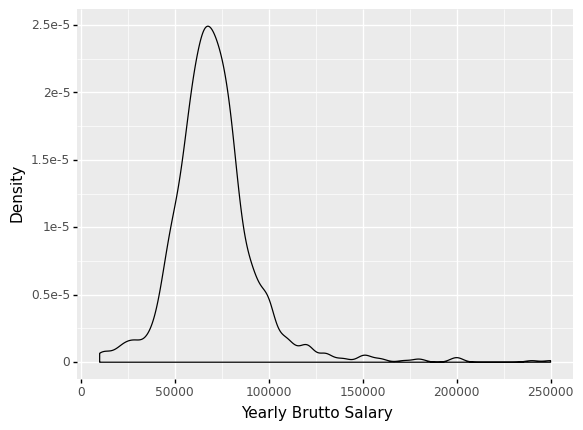

<ggplot: (8772470640842)>

In [861]:
densityplot

In [862]:
# There is a notorious improvement in distribution. At this point it is more ambiguous whether there are further outliers
# or if this is the "correct" distribution for this sample. However, this distribution allows us to check population saturation
# at different salary levels in the IT industry

In [863]:
dictionary1['Gender']

,Gender,Mean,Standard Deviation,Sample Size
0,Diverse,144500,20506,2
1,Female,57476,14153,149
2,Male,72929,23386,888


In [864]:
# Analysis
# The outlier is dealt with by replacing it with the mean and now thee standard deviation and mean aree not as large as they
# were in our previous analysis. By acccounting for one outlier, there is a huge improvemnet in the results. Now we see that 
# mean salary for women is lower than the mean salary for men in the idustry. The standard deviation is also lower for women
# in the industry as compared to men suggesting that the variation in the salaries for men is greater than the variation in the
# salaries for women. 

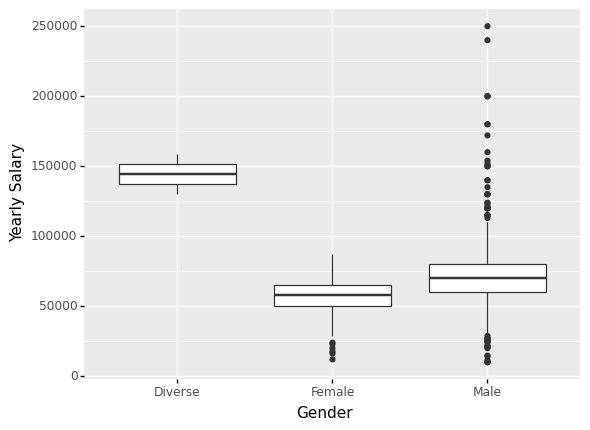

In [865]:
wagebox('Gender')

In [866]:
# Analysis
# The boxplot further explains the dataset and illustrates the outliers in the clearly. We see that for women, the outleirs are
# below the median of their salary in the industry and for men, there are outliers above and below the median salary. The 
# boxplot also suggests that the median salaries of men are greater than the median salaries of women. The outliers above 
# and below the median for men further implies that there are some high-earning males and low-earning males in the industry. 

In [867]:
dictionary1['Age']

,Age,Mean,Standard Deviation,Sample Size
0,20,240000,NaN,1
1,22,50250,46638,8
2,23,54225,13958,11
3,24,50845,22549,23
4,25,59416,15552,38
5,26,63183,25265,51
6,27,58514,17181,51
7,28,62169,14437,72
8,29,68559,17871,76
9,30,67628,19811,91


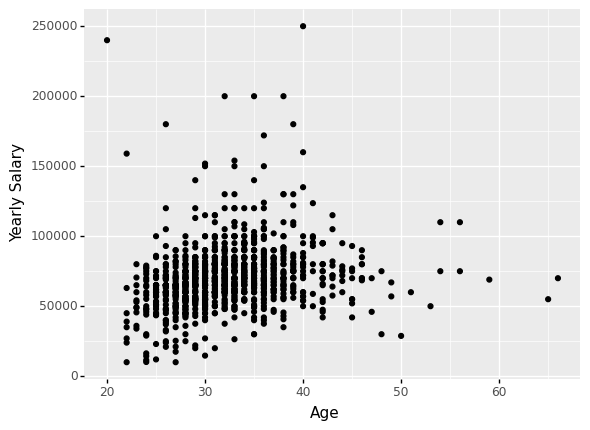

In [868]:
wageplot('Age')

In [869]:
# Analysis
# Now we check how salary varies over age in the IT industry. The graph shows that apart from somee outliers, most of the people
# working in the industry earn less than 100000 Euros. Age does not have a positivvee ccorrelation with salary. This might imply
# that in the IT industry, skills are valued more than experience or that the industry is rapidly cchanging and prior experience
# really does not matter.

In [870]:
# Grouping age into buckets can help analysis and allow us to look at each age bracket in greater detail.

twenty = [20,22,23,24,25,26,27,28,29]

thirty = [30,31,32,33,34,35,36,37,38,39]

fourty = [40,41,42,43,44,45,46,47,48,49]

fiftyplus = [50,51,53,54,56,59,65,66]


for i in twenty:
    df.iloc[getindex('Age', i)] = df.iloc[getindex('Age', i)].replace(i, '20s')
    
for i in thirty:
    df.iloc[getindex('Age', i)] = df.iloc[getindex('Age', i)].replace(i, '30s')

for i in fourty:
    df.iloc[getindex('Age', i)] = df.iloc[getindex('Age', i)].replace(i, '40s')
    
for i in fiftyplus:
    df.iloc[getindex('Age', i)] = df.iloc[getindex('Age', i)].replace(i, '>50')

In [871]:
stat_table(df,'Age',wage)

dictionary2['Age']

,Age,Mean,Standard Deviation,Sample Size
0,20s,62112,22243,331
1,30s,74715,21582,610
2,40s,77000,27585,88
3,>50,70280,25106,10


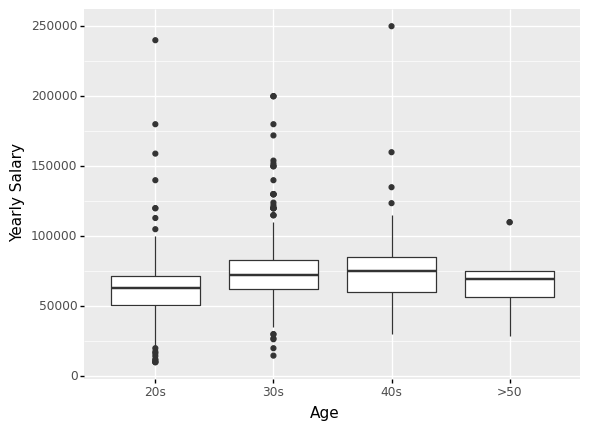

In [872]:
wagebox('Age')

In [873]:
# Analysis
# The boxplot further explians how age affects yearly salary. Here we notice that with age, the median salary slightly 
#increases but decreases when people cross the 50 year age threshold. 
# We see that there are outliers in the ages groups of 20s and 30s
# which can be because people in these age brackets are more likely to start a new startup and the entreprenuerial mindset allows
# these people to take more risks and with more risks comes more rewards. This is why we see outliers above and below the mean.
# This further implies that the not all startups works and the ones that do can earn high incomes. 

In [874]:
# Dataframe needs to be reloaded to revert age changes

df = pd.read_csv('/Users/nicomontenegrob/Documents/NYU/Data Bootcamp/Clean_df.csv')

df = df.iloc[:,1:len(df)]

wage = 'Yearly brutto salary (without bonus and stocks) in EUR'

indivcleaner(wage, 500000000, wagemedian)

indivcleaner(wage, 850000, wagemedian)

In [875]:
dictionary1['City']

,City,Mean,Standard Deviation,Sample Size
0,Aachen,40082,42310,2
1,Amsterdam,77142,18682,6
2,Ansbach,42000,NaN,1
3,Barcelona,31000,12728,2
4,Berlin,73010,21802,566
5,Bielefeld,55000,NaN,1
6,Bodensee,81000,NaN,1
7,Boeblingen,57000,11533,3
8,Bonn,54233,1504,3
9,Braunschweig,75000,NaN,1


In [876]:
# Analysis

In [877]:
# The majority of the cities recorded have small sizes (including some with just 1 entry)

# This makes data analysis unreliable so only those with the largest sample sizes should be looked at

majorcities = dictionary1['City'].sort_values('Sample Size', ascending = False).head(5)

majorcities

,City,Mean,Standard Deviation,Sample Size
4,Berlin,73010,21802,566
51,Munich,76112,20980,204
24,Frankfurt,63097,18012,35
26,Hamburg,62799,21593,34
69,Stuttgart,64438,12439,24


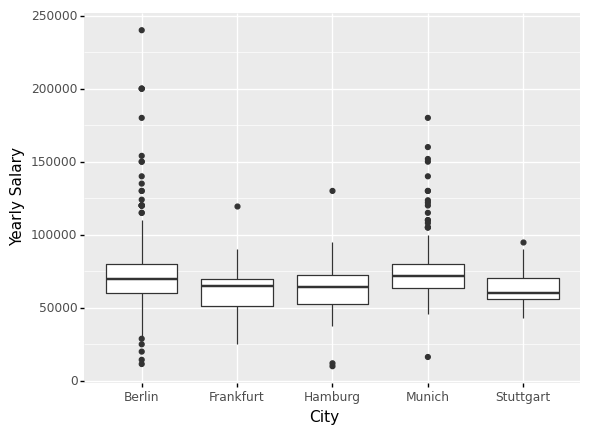

<ggplot: (8772497763856)>

In [878]:
majorcitiesplot = df.loc[df['City'].isin(['Berlin','Munich','Frankfurt','Hamburg','Stuttgart'])]

ggplot(majorcitiesplot, aes(x='City', y = wage)) + geom_boxplot() + ylab('Yearly Salary')

In [879]:
# Analysis
# By looking at the major cities, we can further checkk which cities pay the most. From the boxplot, we see that Beerlin and 
# Munich pay more than the other major cities. Especially Munich, where the boxplot is boxplot is skewed upwards with littel
# vatiation. We also see that most of the outliers are also in these two cities. This implies that the salaries in these cities
# can vary from very low to very high, but median salary is the highest in Germany with potential of earning more as well.

In [880]:
dictionary1['Total years of experience']

,Total years of experience,Mean,Standard Deviation,Sample Size
0,0,38915,17123,8
1,1,51570,30877,27
2,2,51554,12897,56
3,3,53637,18590,56
4,4,58364,14641,71
5,5,67092,24227,115
6,6,71418,20429,88
7,7,69310,13945,71
8,8,69117,15388,75
9,9,75882,14277,52


In [881]:
# Analysis
# Now we analyze if total year of experience in the industry can impact salary.

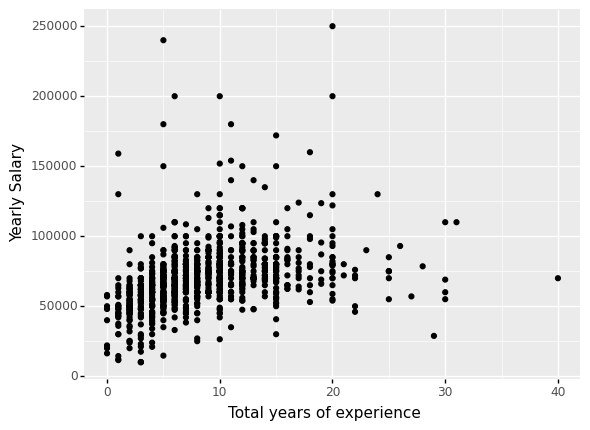

In [882]:
wageplot('Total years of experience')

In [883]:
# Analysis
# From the graph, we see that yearly salary is positiveely correlated with the years of experience, but after 15 years of 
# experience, each additional year does not make a huge difference in the earnings.

In [884]:
# The same process that was done for Age entries can be done here

lessthanten = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
       
ten = [10,11,12,13,14,15,16,17,18,19]
    
twenty = [20,21,22,23,24,25,26,27,28,29]

thirty = [30,31]

fourty = [40]


c = 'Total years of experience'


for i in lessthanten:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '0-10')

for i in ten:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '10-19')

for i in twenty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '20-29')
    
for i in thirty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '30-39')

for i in fourty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '40')

In [885]:
stat_table(df,c,wage)

dictionary2[c]

,Total years of experience,Mean,Standard Deviation,Sample Size
0,0-10,64280,20436,619
1,10-19,80066,21347,372
2,20-29,84907,38034,42
3,30-39,80800,27124,5
4,40,70000,NaN,1


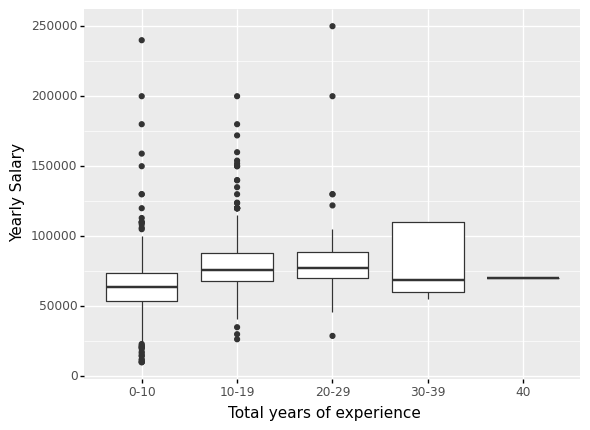

<ggplot: (8772467158507)>

In [886]:
ggplot(df, aes(x = c, y = wage)) + geom_boxplot() + ylab('Yearly Salary')

In [887]:
# Analysis
# From the boxplot, we see that the outliers below the median decrease with an increase in work experience in the industry.
# There is an apparent increase in the median salary with an increase in work experience. Furthermore, we also notice a
# decreasing trend in the number of outliers with an increase in work exprience suggesting that with an increase in work 
# experience, people will be earning close to the median salary.

In [888]:
# Dataframe needs to be reloaded to revert age changes

df = pd.read_csv('/Users/nicomontenegrob/Documents/NYU/Data Bootcamp/Clean_df.csv')

df = df.iloc[:,1:len(df)]

wage = 'Yearly brutto salary (without bonus and stocks) in EUR'

indivcleaner(wage, 500000000, wagemedian)

indivcleaner(wage, 850000, wagemedian)

In [889]:
dictionary1['Years of experience in Germany']

,Years of experience in Germany,Mean,Standard Deviation,Sample Size
0,0,57216,30054,114
1,1,63132,17709,164
2,2,67154,21257,200
3,3,69239,14225,131
4,4,76529,23483,121
5,5,77351,15805,123
6,6,84854,24630,60
7,7,82365,32056,34
8,8,82783,23326,12
9,9,92573,32165,14


In [890]:
# Analysis
# We now check if work experience in Germany affects salary. From the data, we see a positive trend in the salary with an 
# increase in years of work experience. This data could better explain the findings if the sample size was bigger than what 
# we have right now. Nonetheless, we see a consistent increase in average salary uptill 9 years of work experience in Germany,
# but after that the sample size is not large enough for us to make judgements.

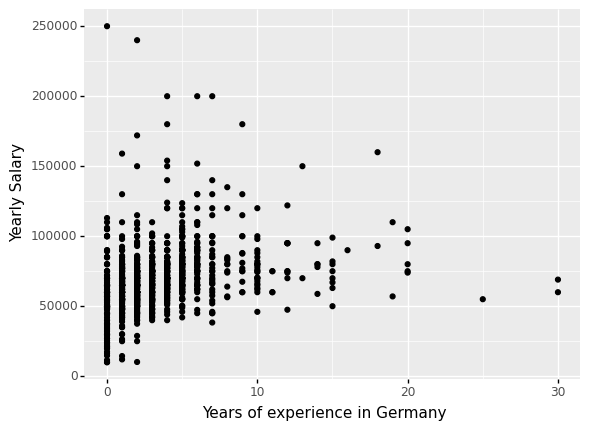

In [891]:
wageplot('Years of experience in Germany')

In [892]:
# Analysis
# The graph further illustrates the data and explains what wwe discussed before. We can see a positive correlation here between
# yearly salary and years of work experience. 

In [893]:
# The same process that was done for Age entries can be done here

lessthanten = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
       
ten = [10,11,12,13,14,15,16,18,19]
    
twenty = [20,25]

thirty = [30]


c = 'Years of experience in Germany'


for i in lessthanten:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '0-10')

for i in ten:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '10-19')

for i in twenty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '20-29')
    
for i in thirty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '30')

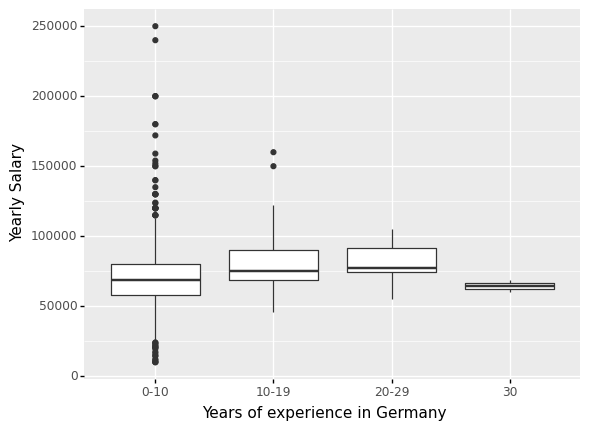

<ggplot: (8772465485623)>

In [894]:
ggplot(df, aes(x = c, y = wage)) + geom_boxplot() + ylab('Yearly Salary')

In [895]:
# Analysis
# We now use a boxplot to further analyze the distribution of outliers as well as check the medians instead of the means. Here
# we see that the positive correlation still remains intact but up till 29 years, after which the reelation turns negative. The
# reason for this is becuase of the sample size of the people with moree than 29 years of work experience in Germany. We also 
# see that the most of the outliers are in the range of 0-10 years of work experience. 

In [896]:
# Dataframe needs to be reloaded to revert age changes

df = pd.read_csv('/Users/nicomontenegrob/Documents/NYU/Data Bootcamp/Clean_df.csv')

df = df.iloc[:,1:len(df)]

wage = 'Yearly brutto salary (without bonus and stocks) in EUR'

indivcleaner(wage, 500000000, wagemedian)

indivcleaner(wage, 850000, wagemedian)

In [897]:
dictionary1['Seniority level']

,Seniority level,Mean,Standard Deviation,Sample Size
0,C-Level,155000,42720,3
1,Intern,21430,9340,4
2,Junior,47730,12717,68
3,Lead,91163,28526,169
4,Middle,58938,13952,307
5,No level,58750,15910,2
6,Senior,74614,17836,485
7,Student,12000,NaN,1


In [898]:
# Analysis
# We now check if seniority in the company affects salary.

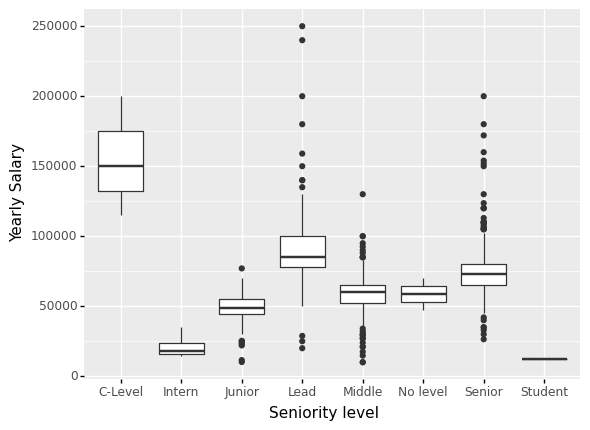

In [899]:
wagebox('Seniority level')

In [900]:
# Analysis

In [901]:
c = 'Your main technology / programming language'

len(dictionary1[c])

102

In [902]:
# Due to the diversity of the entries, it is better to segment the data to spot clearer trends

codehigh = dictionary1[c].sort_values('Mean', ascending = False).head(8)

codehigh

,Your main technology / programming language,Mean,Standard Deviation,Sample Size
20,Cobol,159000,NaN,1
61,Pegasystems Platform,140000,NaN,1
87,Spring,135000,NaN,1
9,Autonomous Driving,123600,NaN,1
19,Cloud,109000,39154,3
86,Spark,108333,62115,3
88,Sre,105000,NaN,1
7,Apachespark,100000,NaN,1


In [903]:
codelow = dictionary1[c].sort_values('Mean', ascending = False).tail(8)

codelow

,Your main technology / programming language,Mean,Standard Deviation,Sample Size
68,Ps,45000,NaN,1
29,Figma,45000,0,2
85,Sketch,42000,NaN,1
98,Web,39000,16971,2
92,Tricentis Tosca,32000,NaN,1
8,Apotheker,30000,NaN,1
32,Gcp,30000,NaN,1
28,Fbd,30000,NaN,1


In [904]:
# Analysis
# We now check if somee certain programming languages pay more in the industry or not.

In [905]:
codemid = dictionary1[c].sort_values('Sample Size', ascending = False).head(10)

codemid

,Your main technology / programming language,Mean,Standard Deviation,Sample Size
37,Java,72219,22296,201
69,Python,68927,22625,199
38,Javascript,66406,17709,87
63,Php,63846,18029,68
14,C,73137,29988,55
15,C#,70555,35262,31
94,Typescript,82836,20668,29
89,Swift,74510,35359,29
84,Scala,84574,22802,27
45,Kotlin,74731,12453,26


In [906]:
codemean = dictionary1[c]['Mean'].mean()

round(codemean)

71245

In [907]:
# Analysis
# The table above shows us the top ten paying progarmming languages that people working in the industry know of and how much
# knowing each one pays on average. The top three programming languages are Java, Python, and Javascript.

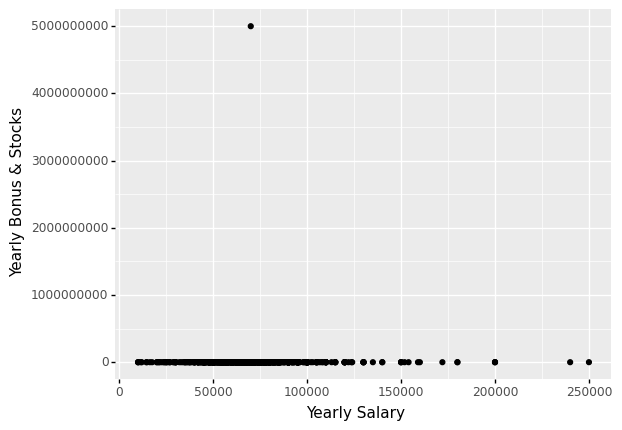

<ggplot: (8772495460883)>

In [908]:
c = 'Yearly bonus + stocks in EUR'

ggplot(df, aes(x= wage, y = c)) + geom_point() + xlab('Yearly Salary') + ylab('Yearly Bonus & Stocks')

In [909]:
# Just by looking at the a plot there clearly is an outlier 

# This intuitively is also an erroneous response judging by the other columns for the same row since it is in the same 

# row where yearly was previously replaced with the median wage.

bonusmedian = df[c].median()

indivcleaner(c, 5000000000, bonusmedian)

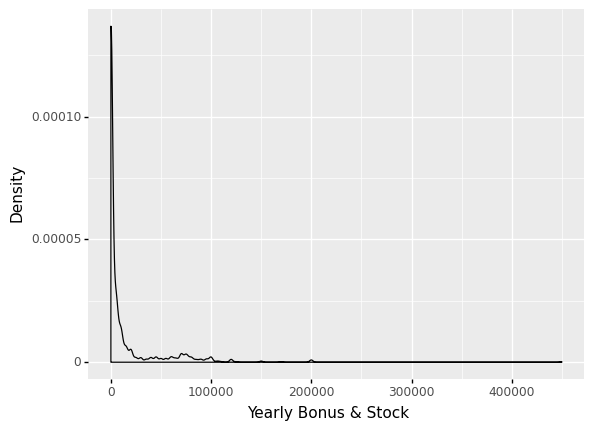

<ggplot: (8772495111662)>

In [910]:
ggplot(df, aes(x = c)) + geom_density() + ylab('Density') + xlab('Yearly Bonus & Stock')

In [911]:
# Density plot supports using median()

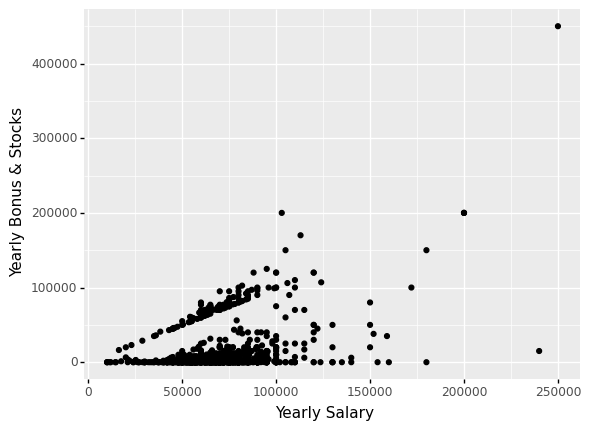

<ggplot: (8772495639694)>

In [912]:
ggplot(df, aes(x= wage, y = c)) + geom_point() + xlab('Yearly Salary') + ylab('Yearly Bonus & Stocks')

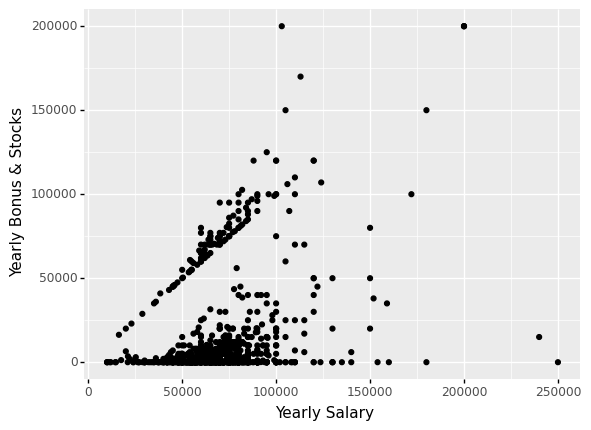

<ggplot: (8772496145086)>

In [913]:
# The data point at 450,000 bonus & stock can also be removed to study the trend in the vast majority of the data

indivcleaner(c, 450000, bonusmedian)

ggplot(df, aes(x= wage, y = c)) + geom_point() + xlab('Yearly Salary') + ylab('Yearly Bonus & Stocks')

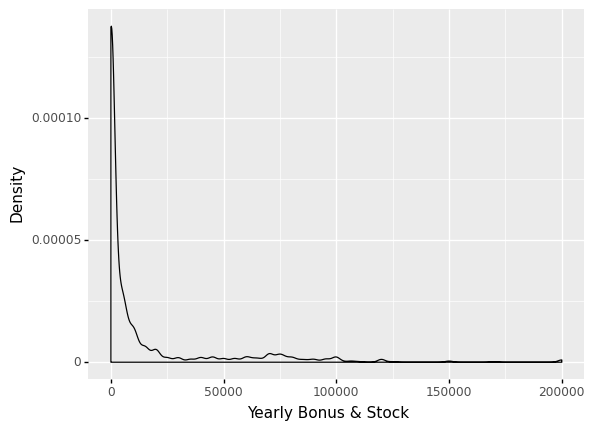

<ggplot: (8772465396282)>

In [914]:
ggplot(df, aes(x = c)) + geom_density() + ylab('Density') + xlab('Yearly Bonus & Stock')

In [915]:
# Analysis
# By accounting for a few outliers, we can now study the findings of our analysis in greater detail.

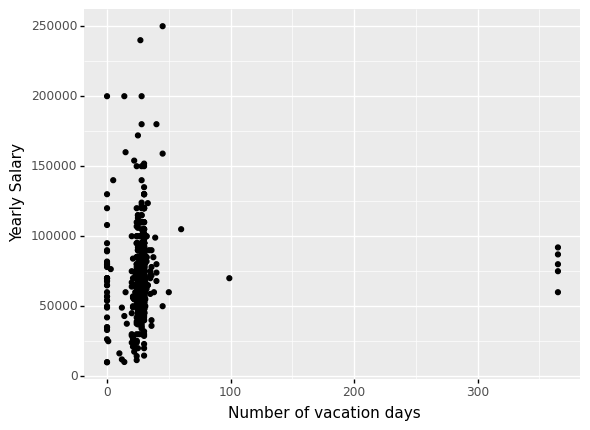

In [916]:
c = 'Number of vacation days'

wageplot(c)

In [917]:
# Although the the data points on the right are not outliers, dropping them to 1) analyze those three separately
# and 2) plot the rest can provide richer conclusions

limited_vacations = df.loc[df[c] != 365]

unlimited_vacations = df.loc[df[c] == 365]

wagemean = df[wage].mean() # This calculation has outliers/errors replaced so using mean() is appropiate

wagemean

70850.8480558229

In [918]:
print('Difference between mean and median wage: ',round(((wagemean - wagemedian)*100/wagemedian),2),'%', sep = '')

Difference between mean and median wage: 1.22%


In [919]:
# Additionally the difference between mean and median is negligeble with the current distribution

In [920]:
print('Difference between mean and median wage: ',round(((unlimited_vacations[wage].mean() - wagemean)*100/wagemean),2),'%', sep = '')

Difference between mean and median wage: 11.22%


In [921]:
# Analysis

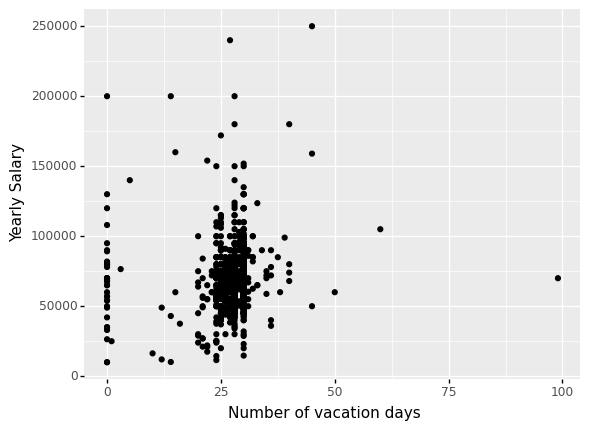

<ggplot: (8772494878699)>

In [922]:
ggplot(limited_vacations, aes(x= c, y = wage)) + geom_point() + xlab(c) + ylab('Yearly Salary')

In [923]:
# Analysis
# The above graph suggests that most of the people working in the industry have 20-30 vacation days and the graph also suggests
# that vacation days does not affect the salary of the person. 

In [924]:
dictionary1['Employment status']

,Employment status,Mean,Standard Deviation,Sample Size
0,Founder,67500,45962,2
1,Full-time,70600,21039,1006
2,Intern,18225,11255,4
3,Part-time,34498,26512,6
4,Self-employed,103591,56597,21


In [925]:
# Analysis
# We now check if employment status affects yearly salary or not.

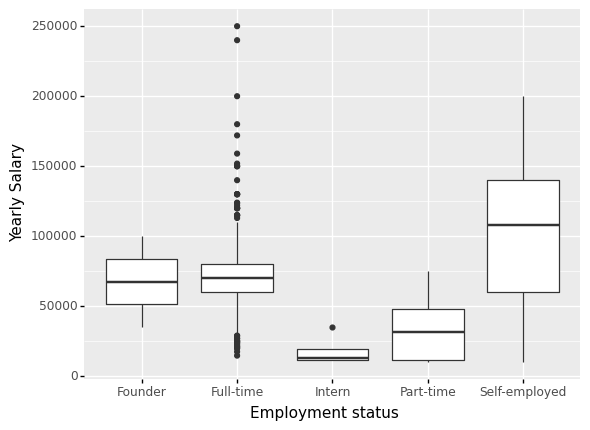

In [926]:
wagebox('Employment status')

In [927]:
# Analysis
# From the above table and the boxplot, we see that self-employed people and people working full-time earned, on average, 
# the most amount of money during the year. Self-employed people made more money during the year because of the Covid-19 pandemic.
# During the pandemic, the demand for online shopping sky-rocketed and a lot of retailers reverted to free-lancers for their
# IT services. This is why we see a bigger spread for self-employed people in our boxplot. Furthermore, we also see that intern 
# part-time average salaries were very low. This is because the economy in general was not doing great because of the pandemic.
# Another interesting thing we notice is that almost all the outliers are in the full-time position with some people earning
# higher salaries and some earning very low salaries. These outliers suggest that the variation/standard deviation
# in average salaries in the full-time positions are due to these outliers and that there is not much variation in the full-time
# average salary in the IT industry.

In [928]:
dictionary1['Main language at work']

,Main language at work,Mean,Standard Deviation,Sample Size
0,Bilingual,72000,31488,5
1,Czech,21120,NaN,1
2,English,72304,22620,859
3,French,80000,NaN,1
4,German,66080,23609,157
5,Italian,37600,12350,3
6,Polish,27000,NaN,1
7,Russian,46346,23040,9
8,Spanish,37333,6429,3


In [929]:
# Analysis

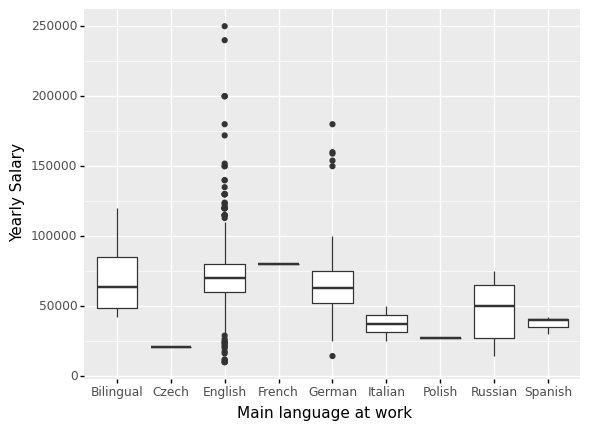

In [930]:
wagebox('Main language at work')

In [931]:
# Analysis

In [932]:
dictionary1['Company size']

,Company size,Mean,Standard Deviation,Sample Size
0,1000+,75720,24473,373
1,101-1000,70734,18460,344
2,11-50,66037,24167,146
3,51-100,65676,18591,126
4,up to 10,62422,37742,50


In [2]:
wagebox('Company size')

NameError: name 'wagebox' is not defined

In [ ]:
# Analysis
# We now check if company size had an impact on the earning during the year.
# From the above table and the boxplot, we see that, on average, bigger companies made more money.

In [934]:
dictionary1['Have you lost your job due to the coronavirus outbreak?']

,Have you lost your job due to the coronavirus outbreak?,Mean,Standard Deviation,Sample Size
0,No,70493,21630,984
1,Yes,77245,41777,55


In [935]:
# Analysis

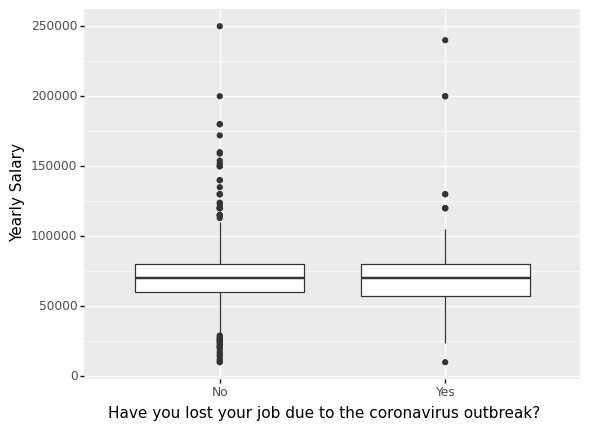

In [936]:
wagebox('Have you lost your job due to the coronavirus outbreak?')

In [937]:
# Analysis

In [563]:
df_age_yearlysalary = df[["Age", "Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Gender"]].copy()
df_age_yearlysalary.columns = ["Age", "Yearly salary", "Bonus", "Gender"]

df_age_yearlysalary.sort_values("Yearly salary", ascending = False, inplace = True)
df_age_yearlysalary.head()

,Age,Yearly salary,Bonus,Gender
641,42.0,850000.0,95000.0,Male
518,40.0,250000.0,450000.0,Male
662,20.0,240000.0,15000.0,Male
469,38.0,200000.0,200000.0,Male
359,32.0,200000.0,200000.0,Male


Then, we calculate total compensation as the sum of the salary and bonus

In [564]:
df_age_yearlysalary["Total comp"] = df_age_yearlysalary["Yearly salary"] + df_age_yearlysalary["Bonus"]

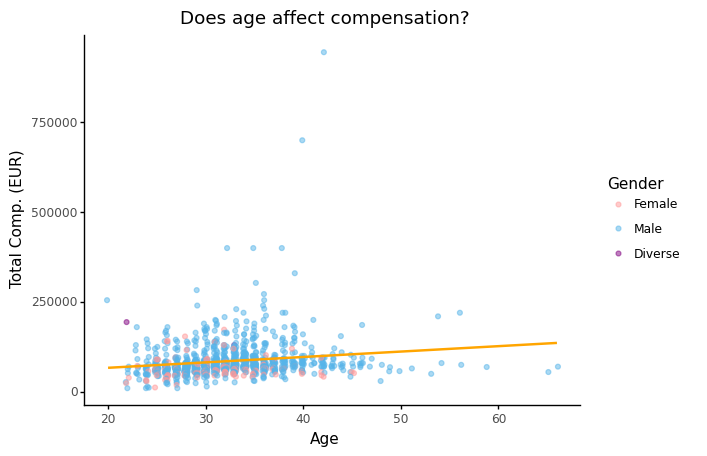

<ggplot: (129534320604)>

In [565]:
ggplot(df_age_yearlysalary, aes("Age", "Total comp", color = "Gender")) + geom_point(alpha = 0.5, position = position_jitter(width = 0.2, height = 0.0)) + geom_smooth(method = "ols", color = "orange", se = False) + labs(title = "Does age affect compensation?", x = "Age", y = "Total Comp. (EUR)") + scale_color_manual(breaks = ["Female", "Male", "Diverse"],
                        values=["#FF9999", "#56B4E9", "purple"]) + theme_classic()

Since the values are very spread out on the y axis, we apply a log transformation to the compensation variable. This means we are also showing the return of age upon one's compensation.

In [566]:
df_age_yearlysalary["log10_Total_comp"] = np.log10(df_age_yearlysalary["Total comp"])

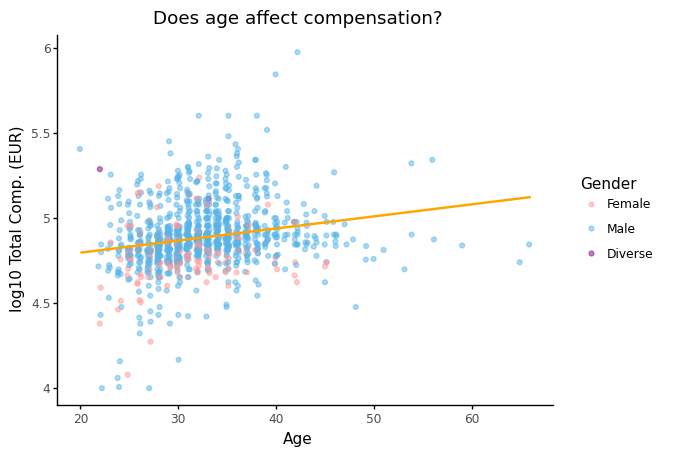

<ggplot: (129530389014)>

In [567]:
ggplot(df_age_yearlysalary, aes("Age", "log10_Total_comp", color = "Gender")) + geom_point(alpha = 0.5, position = position_jitter(width = 0.2, height = 0.0)) + geom_smooth(method = "ols", color = "orange", se = False) + labs(title = "Does age affect compensation?", x = "Age", y = "log10 Total Comp. (EUR)") + scale_color_manual(breaks = ["Female", "Male", "Diverse"],
                        values=["#FF9999", "#56B4E9", "purple"]) + theme_classic()

From the graphs above, we can observe that there is an upwards trend with compensation and age. Is this trend significant, however?

In [568]:
model1 = smf.ols("log10_Total_comp ~ Age", df_age_yearlysalary).fit(cov_type = "HC3")
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log10_Total_comp   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           6.40e-08
Time:                        20:02:07   Log-Likelihood:                 263.22
No. Observations:                1038   AIC:                            -522.4
Df Residuals:                    1036   BIC:                            -512.6
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6550      0.043    108.719      0.000       4.571       4.739
Age            0.0071      0.001      5.447      0.000       0.005       0.010
==============================================================================
Omnibus:                      102.652   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.660
Skew:                           0.271   Prob(JB):                    2.40e-118
Kurtosis:                       6.497   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

We can see that while the coefficient for Age is significant, this model only explains about 4% of the total variation in log10 Total compensation.

# Analysis of Compensation in Current Period vs a Year Ago

Our goal is to find out whether there has been a significant change in compensation from a year ago. 

In [569]:
df_2 = df[["Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country", "Annual bonus+stocks one year ago. Only answer if staying in same country"]].copy()
df_2.columns = ["Yearly salary", "Bonus", "Yearly salary yr ago", "Bonus yr ago"]

In [570]:
df_2.sample(5, random_state=33)

,Yearly salary,Bonus,Yearly salary yr ago,Bonus yr ago
727,90000.0,0.0,104000.0,10000
645,68000.0,8000.0,60000.0,8000
877,52500.0,0.0,No Response,No Response
2,120000.0,120000.0,100000.0,100000
805,65000.0,3250.0,No Response,No Response


Not all rows contain enough information, so we will filter those out.

In [571]:
#Some extra cleaning
df_2 = df_2.loc[(df_2["Yearly salary yr ago"] != "No Response") & (df_2["Bonus yr ago"] != "No Response") & (df_2["Bonus yr ago"] != "learning budget, bvg, gym, food")]
df_2["Bonus yr ago"] = df_2["Bonus yr ago"].replace("No", 0)
df_2.sample(5, random_state = 33)

,Yearly salary,Bonus,Yearly salary yr ago,Bonus yr ago
251,63500.0,63500.0,60000.0,60000
531,63000.0,0.0,42000.0,46000
609,74000.0,11000.0,72000.0,5000
503,78000.0,0.0,78000.0,0
447,83000.0,17000.0,80000.0,10000


In [572]:
#The following two cells ensure that we are adding numbers and not strings
df_2["Yearly salary yr ago"] = pd.to_numeric(df_2["Yearly salary yr ago"])
df_2["Bonus yr ago"] = pd.to_numeric(df_2["Bonus yr ago"])

In [573]:
df_2["Total comp"] = df_2["Yearly salary"] + df_2["Bonus"]
df_2["Total comp yr ago"] = df_2["Yearly salary yr ago"] + df_2["Bonus yr ago"]

In [574]:
#Transforming data so that there's a factor column
df_3 = pd.DataFrame(df_2["Total comp"].copy())
df_3["When"] = "Current"
df_4 = pd.DataFrame(df_2["Total comp yr ago"].copy())
df_4.columns = ["Total comp"]
df_4["When"] = "Year ago"
df_5 = pd.concat([df_3, df_4], axis = 0)
df_5.sample(5, random_state = 333)

,Total comp,When
744,95000.0,Current
542,74000.0,Current
789,160000.0,Year ago
137,75000.0,Year ago
114,100000.0,Year ago


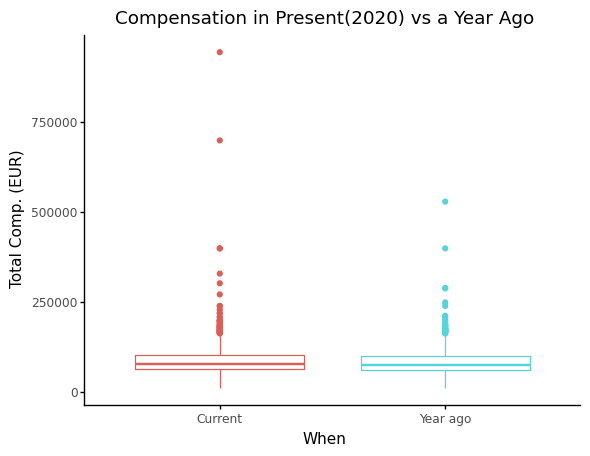

<ggplot: (129531261133)>

In [575]:
ggplot(df_5, aes(x = "When", y = "Total comp", color = "When")) + geom_boxplot() + labs(title = "Compensation in Present(2020) vs a Year Ago", x = "When", y = "Total Comp. (EUR)") + theme_classic() + guides(color = False)

Again, we will log transform Total compensation.

In [576]:
df_5["log10 Total comp"] = np.log10(df_5["Total comp"])

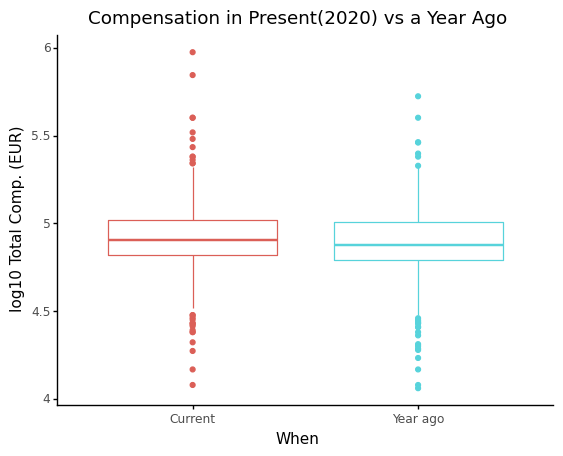

<ggplot: (129534305247)>

In [577]:
ggplot(df_5, aes(x = "When", y = "log10 Total comp", color = "When")) + geom_boxplot() + labs(title = "Compensation in Present(2020) vs a Year Ago", x = "When", y = "log10 Total Comp. (EUR)") + theme_classic() + guides(color = False)

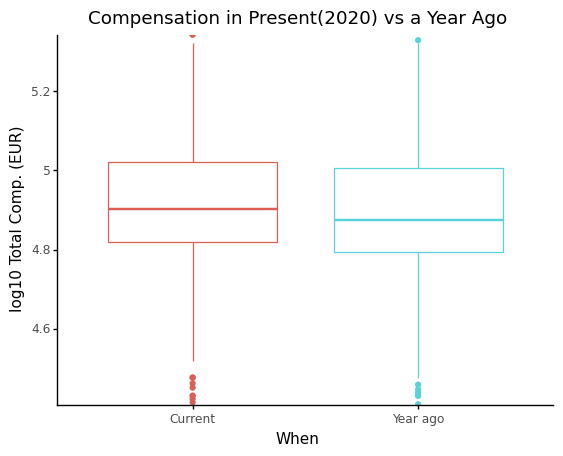

<ggplot: (129535590358)>

In [578]:
#Zoomed in version of graph above, no outliers removed
ggplot(df_5, aes(x = "When", y = "log10 Total comp", color = "When")) + geom_boxplot() + coord_cartesian(ylim = [df_5["log10 Total comp"].quantile(.025), df_5["log10 Total comp"].quantile(.975)]) + labs(title = "Compensation in Present(2020) vs a Year Ago", x = "When", y = "log10 Total Comp. (EUR)") + theme_classic() + guides(color = False)

It seems like there was a change in compensation from a year ago. Does it represent a significant level of change?

In [579]:
stats.shapiro(df_2["Total comp"])

ShapiroResult(statistic=0.5692780017852783, pvalue=3.24896605539325e-34)

In [580]:
stats.shapiro(df_2["Total comp yr ago"])

ShapiroResult(statistic=0.7864558696746826, pvalue=7.463078991006438e-26)

Data clearly isn't normal, so we can't use a paired difference t-test. 

In [581]:
stats.wilcoxon(df_2["Total comp"], df_2["Total comp yr ago"])

WilcoxonResult(statistic=16888.0, pvalue=2.4442092860863012e-29)

It seems like the median difference in total compensation isn't 0

# Analysis of number of technologies and compensation

We are interested in learning whether knowing more technologies significantly adds to one's compensation

To prepare the data for this analysis, we need to define some helper functions and use them to translate the strings to numbers with pd.apply

In [582]:
def split_str_at_comma(string):
    return [x.strip().lower() for x in string.split(",")]
def count_tech(tech_list):
    x = set(tech_list)
    if "No Response" in x:
        return len(x) - 1
    else:
        return len(x)

In [585]:
df_tech_analysis = df[["Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Your main technology / programming language", "Other technologies/programming languages you use often"]].copy()
df_tech_analysis.columns = ["Yearly salary", "Bonus", "Main tech", "Other tech"]
df_tech_analysis["Total_comp"] = df_tech_analysis["Yearly salary"] + df_tech_analysis["Bonus"]
df_tech_analysis["log10_Total_comp"] = np.log10(df_tech_analysis["Total_comp"])

In [586]:
a = df_tech_analysis["Other tech"].apply(split_str_at_comma)
b = df_tech_analysis["Main tech"].apply(split_str_at_comma)
c = a + b
print(c)

641                  [javascript / typescript, react.js]
518                                 [no response, swift]
662                                           [.net, c#]
469                           [python, c/c++, docker, c]
359                                [python, c/c++, java]
                             ...                        
561                            [java / scala, sql, ruby]
939                                     [python, python]
304                              [python, c/c++, python]
725    [javascript / typescript, .net, sql, docker, ....
813    [python, javascript / typescript, sql, aws, do...
Length: 1038, dtype: object


In [587]:
d = c.apply(count_tech)
print(d)

641    2
518    2
662    2
469    4
359    3
      ..
561    3
939    1
304    2
725    4
813    6
Length: 1038, dtype: int64


In [588]:
df_tech_analysis["Number_of_technologies"] = d

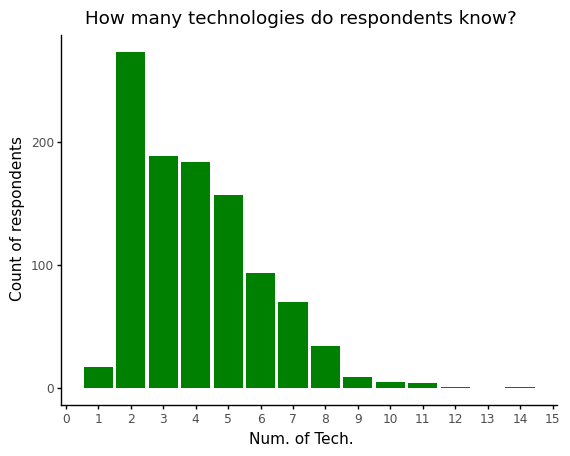

<ggplot: (129537289268)>

In [589]:
ggplot(df_tech_analysis, aes("Number_of_technologies")) + geom_bar(fill = "green") + scale_x_continuous(breaks = np.arange(16)) + labs(title = "How many technologies do respondents know?", x = "Num. of Tech.", y = "Count of respondents") + theme_classic()

It seems most respondents know 5 or less technologies

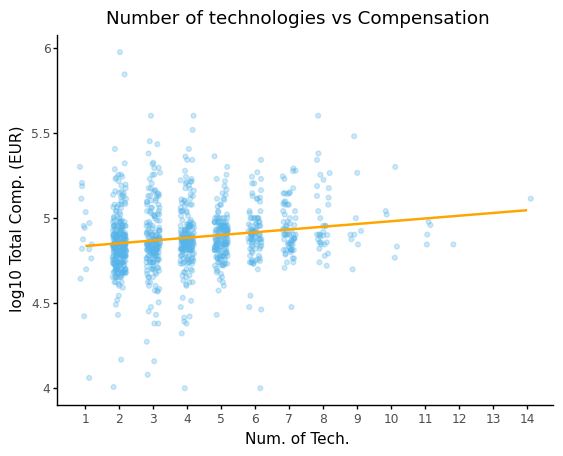

<ggplot: (129537263523)>

In [590]:
ggplot(df_tech_analysis, aes("Number_of_technologies", "log10_Total_comp")) + geom_point(alpha = 0.3, position = position_jitter(width = 0.2, height = 0.0), color = "#56B4E9") + stat_smooth(method = "ols", color = "orange", se = False) + scale_x_continuous(breaks = np.arange(16)) + labs(title = "Number of technologies vs Compensation", x = "Num. of Tech.", y = "log10 Total Comp. (EUR)") + theme_classic()

We can see that there's some sort of positive relationship between number of technologies and total compensation. 

In [591]:
model2 = smf.ols("log10_Total_comp ~ Number_of_technologies", df_tech_analysis).fit(cov_type = "HC3")
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log10_Total_comp   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     29.08
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           8.62e-08
Time:                        20:03:33   Log-Likelihood:                 254.65
No. Observations:                1038   AIC:                            -505.3
Df Residuals:                    1036   BIC:                            -495.4
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.8201      0.014    341.250      0.000       4.792       4.848
Number_of_technologies     0.0162      0.003      5.392      0.000       0.010       0.022
==============================================================================
Omnibus:                      122.013   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              846.833
Skew:                           0.269   Prob(JB):                    1.30e-184
Kurtosis:                       7.392   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

However, using number of technologies as a predictor for compensation isn't as good (R-squared = 0.027)

   Seniority level   Gender      perc
0          C-Level     Male  1.000000
1           Intern   Female  0.500000
2           Intern     Male  0.500000
3           Junior     Male  0.691176
4           Junior   Female  0.308824
5             Lead     Male  0.940828
6             Lead   Female  0.053254
7             Lead  Diverse  0.005917
8           Middle     Male  0.752443
9           Middle   Female  0.244300
10          Middle  Diverse  0.003257
11        No level   Female  0.500000
12        No level     Male  0.500000
13          Senior     Male  0.917526
14          Senior   Female  0.082474
15         Student   Female  1.000000


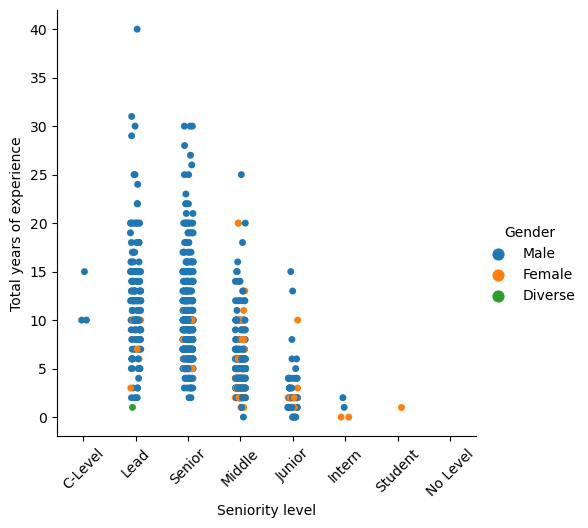

In [43]:
df4 = (df.groupby('Seniority level')['Gender'].value_counts(normalize=True).reset_index(name='perc'))
print (df4)


chartOne = sns.catplot(x='Seniority level', y="Total years of experience", hue='Gender',data=df, order=["C-Level", "Lead", "Senior", "Middle", "Junior", "Intern", "Student", "No Level"])
chartOne.set_xticklabels(rotation=45)

##Analysis 

In this graph we can see the relationship between Seniority Level and Total years of experience along with gender. Right off the bat, we can see this data contains unequal proportions of males and females. This could be because there are just overall more males in the industry the data is "representative", or it can be due to poor sampling procedures. In this specififc chart, we also see a disproportionate amount of females in relation to roles. As we move up in terms of experience or up in terms of Seniority level, we see heavy male presence as evidenced with huge saturations of blue. Most of the female participants lie within the Student to Middle range in terms of Seniority and 0 to 12 years of experience. 

In [ ]:
#Job Loss vs Company Size

In [6]:
df["Have you lost your job due to the coronavirus outbreak?"].describe()

count     1039
unique       2
top         No
freq       984
Name: Have you lost your job due to the coronavirus outbreak?, dtype: object

In [7]:
df["Company size"].describe()

count      1039
unique        5
top       1000+
freq        373
Name: Company size, dtype: object

In [8]:
response = df["Company size"].unique()

In [9]:
df_job_size = df.groupby(["Company size", "Have you lost your job due to the coronavirus outbreak?"])["Have you lost your job due to the coronavirus outbreak?"].count()

df_job_size

Company size  Have you lost your job due to the coronavirus outbreak?
1000+         No                                                         357
              Yes                                                         16
101-1000      No                                                         331
              Yes                                                         13
11-50         No                                                         137
              Yes                                                          9
51-100        No                                                         118
              Yes                                                          8
up to 10      No                                                          41
              Yes                                                          9
Name: Have you lost your job due to the coronavirus outbreak?, dtype: int64

<AxesSubplot:title={'center':'Job Loss based on Company Size'}, xlabel='Company Size and Response', ylabel='Number of Responses'>

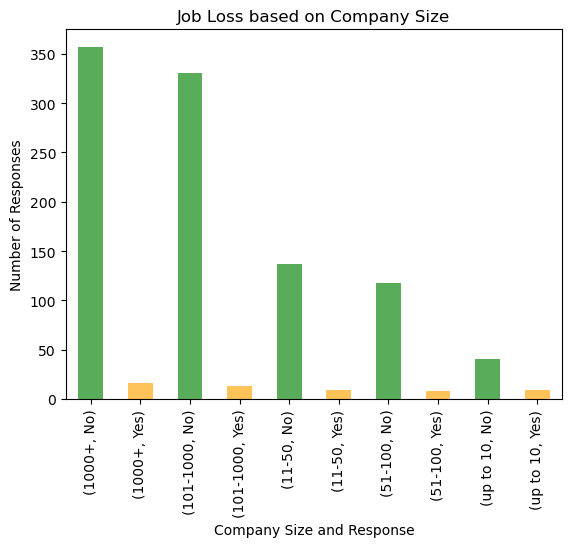

In [61]:
df_job_size.plot.bar(xlabel="Company Size and Response", ylabel="Number of Responses", title="Job Loss based on Company Size", alpha = 0.65, color = ['Green','Orange'])



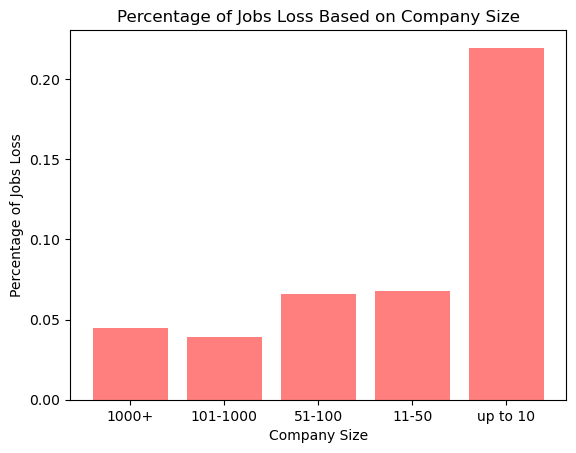

In [52]:
objects = ('1000+', '101-1000', '51-100', '11-50', 'up to 10')
y_pos = np.arange(len(objects))
performance = [(16/357),(13/331),(9/137),(8/118),(9/41)]

plt.bar(y_pos, performance, align='center', alpha=0.5, color = "Red")
plt.xticks(y_pos, objects)
plt.xlabel ('Company Size')
plt.ylabel('Percentage of Jobs Loss')
plt.title('Percentage of Jobs Loss Based on Company Size')

plt.show()

##Analysis

In the section above we are looking at the relationship between Job Loss due to Covid-19 and Company Size. The initial bar chart I made was based on how many people said "Yes" to losing their jobs or "No" to keeping them from different sized companies. We realized that this was not the most ideal way to tackle this, because there are just an overwhelmingly high proportion of "No" votes that prevents us from fully interpreting the significance of the "Yes" votes. That is why in the second part, we decided to calculate the percentages of peope who lost jobs relative to the company size. Here we see a much clearer relationship between the two with the highest percentage of reported job loss being at the smaller companies with up to 10 employees. In this second chart we see that the larger the company size, the smaller the percentage in job loss. 

In [ ]:
#Gender vs Job Loss

In [11]:
df_gender_job = df.groupby(["Gender", "Have you lost your job due to the coronavirus outbreak?"])["Have you lost your job due to the coronavirus outbreak?"]

df_gender_job

In [12]:
df_gender_job.describe()

count unique  top  \
Gender  Have you lost your job due to the coronavirus o...                     
Diverse No                                                     2      1   No   
Female  No                                                   140      1   No   
        Yes                                                    9      1  Yes   
Male    No                                                   842      1   No   
        Yes                                                   46      1  Yes   

                                                           freq  
Gender  Have you lost your job due to the coronavirus o...       
Diverse No                                                    2  
Female  No                                                  140  
        Yes                                                   9  
Male    No                                                  842  
        Yes                                                  46

<AxesSubplot:title={'center':'Relationship between Job Loss and Gender'}, xlabel='Gender', ylabel='Number of Responses'>

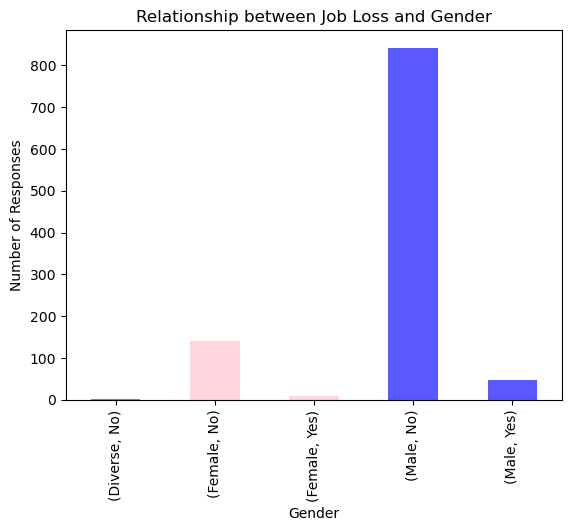

In [60]:
df_gender_job.count().plot.bar(xlabel="Gender", ylabel="Number of Responses", alpha = .65, title ="Relationship between Job Loss and Gender", color = ['Green','Pink', 'Pink','Blue','Blue'])

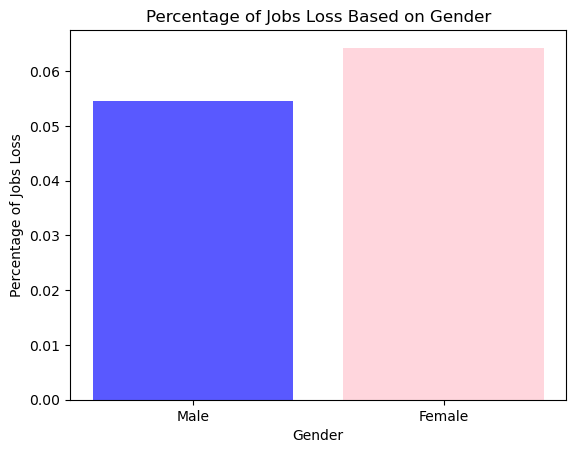

In [59]:
objects = ('Male', 'Female')
y_pos = np.arange(len(objects))
performance = [(46/842),(9/140)]

plt.bar(y_pos, performance, align='center', alpha = 0.65, color =['Blue','Pink'] )
plt.xticks(y_pos, objects)
plt.xlabel ('Gender')
plt.ylabel('Percentage of Jobs Loss')
plt.title('Percentage of Jobs Loss Based on Gender')

plt.show()




 ##Analysis 

The charts above are analysing the relationship between Gender and Job Loss. We ran into a problem similar to the Company Size vs Job Loss analysis and addressed in the Seniority vs. Total years of experience analysis, which was the fact that there are a disproportionately greater amount of males than females in this data. Thus the first graph doesn't do our analysis justice since it is just quantity based. In order to find some significance in this problem, we decided it was best to use percentages again. We wanted to see if there was a greater percentage of either Gender that lost jobs due to Covid. The results came out to be not extremely significant with female jobs loss reported to be just 1% greater than males job loss.


In [ ]:
#Years vs Jobs 

In [14]:
df_experience_job = df.groupby(["Total years of experience"])["Have you lost your job due to the coronavirus outbreak?"].agg(job_loss_count=('count'),)

df_experience_job

,job_loss_count
Total years of experience,
0.0,8
1.0,27
2.0,56
3.0,56
4.0,71
5.0,115
6.0,88
7.0,71
8.0,75


<AxesSubplot:title={'center':'Experience vs. Job Loss'}, xlabel='Total years of experience', ylabel='Number of Jobs Lost'>

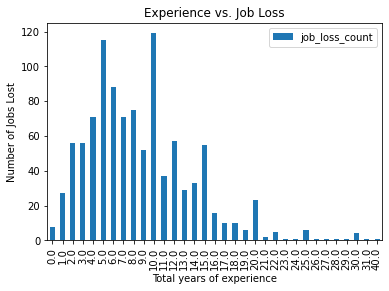

In [16]:
df_experience_job.plot.bar(title="Experience vs. Job Loss", ylabel="Number of Jobs Lost")

##Analysis 

In this section we looked at the relationship between Total years of experience employees have versus whether it had any correlation with their job loss during covid. The results were overall mixed, but we do see a right skew in the data with the most amount of job loss being reported from those with 4 years and 10 years of experience. This does make sense, because the coronavirus pandemic may have impacted those who are less experienced more as they are more replaceable. 